In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
import seaborn as sn
import random

In [2]:
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
# Packages for modeling
from keras.models import Sequential
from keras.layers import *

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix as cm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import svm
#evaluation of model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#all packages 
import nltk 
import string 
import re
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from bs4 import BeautifulSoup
nltk.download('stopwords')
import string #has the list of all punctuations
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
df = pd.read_csv("dataset.csv",encoding="utf-8")

In [8]:
df.head()

,Unnamed: 0,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Sherry Katz, LCSWCouples and Family Therapist,...",https://counselchat.com/therapists/sherry-katz...,"If everyone thinks you're worthless, then mayb...",1,2899,train
1,1,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in...",https://counselchat.com/therapists/robin-landw...,"Hello, and thank you for your question and see...",1,3514,train
2,2,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Lee KingI use an integrative approach to treat...,https://counselchat.com/therapists/lee-king,First thing I'd suggest is getting the sleep y...,0,5,train
3,3,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,"Shauntai Davis-YearginPersonalized, private on...",https://counselchat.com/therapists/shauntai-da...,Therapy is essential for those that are feelin...,0,31,train
4,4,0,Can I change my feeling of being worthless to ...,I'm going through some things with my feelings...,https://counselchat.com/questions/can-i-change...,depression,Jordan WhiteLicensed Social Worker at Oak Root...,https://counselchat.com/therapists/jordan-white,I first want to let you know that you are not ...,0,620,train


In [9]:
df=df.drop('Unnamed: 0',axis=1)

In [10]:
len(df['topic'].unique())

31

In [11]:
df.columns

Index(['questionID', 'questionTitle', 'questionText', 'questionLink', 'topic',
       'therapistInfo', 'therapistURL', 'answerText', 'upvotes', 'views',
       'split'],
      dtype='object')

In [12]:
len(df)

2129

In [13]:
for index,rows in df.iterrows():
    print(df['questionText'][index])

I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.
   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.
   How can I change my feeling of being worthless to everyone?
I'm going thr

In [14]:
len(df['questionTitle'].unique())

818

Axes(0.125,0.11;0.775x0.77)


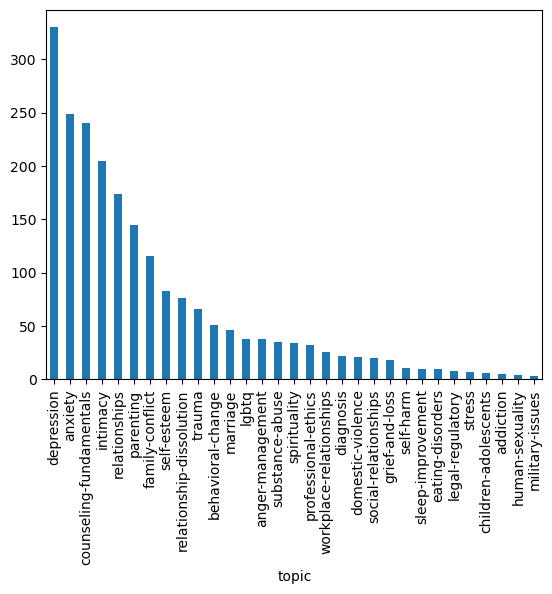

In [61]:
x = df['topic'].value_counts()
print(x.plot.bar())
plt.savefig('./Charts/\Comparison of labels.jpg')

In [16]:
topics = df['topic'].unique()

In [17]:
#for now predict the topic

In [18]:
stop_w = stopwords.words('english')

In [19]:
def clean(column,df,stopwords=False):
  #remove stop words
  df[column] = df[column].apply(str)
  df[column] = df[column].str.lower().str.split()
  if stopwords:
        df[column]=df[column].apply(lambda x: [item for item in x if item not in stop_w])
  #remove punctuation
  df[column]=df[column].apply(lambda x: [item for item in x if item not in string.punctuation])
  df[column]=df[column].apply(lambda x: " ".join(x))
  
  #lowercase text - already done in models

In [20]:
df.dtypes

questionID        int64
questionTitle    object
questionText     object
questionLink     object
topic            object
therapistInfo    object
therapistURL     object
answerText       object
upvotes           int64
views             int64
split            object
dtype: object

In [21]:
clean('questionTitle',df)

In [22]:
df['questionTitle'][155]

"i've been feeling sadness"

In [23]:
clean('questionText',df)

In [24]:
X = df['questionTitle']+df['questionText']
y = df['topic']

In [25]:
y

0                    depression
1                    depression
2                    depression
3                    depression
4                    depression
                 ...           
2124    counseling-fundamentals
2125    counseling-fundamentals
2126    counseling-fundamentals
2127    counseling-fundamentals
2128    counseling-fundamentals
Name: topic, Length: 2129, dtype: object

In [26]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [27]:
le.classes_

array(['addiction', 'anger-management', 'anxiety', 'behavioral-change',
       'children-adolescents', 'counseling-fundamentals', 'depression',
       'diagnosis', 'domestic-violence', 'eating-disorders',
       'family-conflict', 'grief-and-loss', 'human-sexuality', 'intimacy',
       'legal-regulatory', 'lgbtq', 'marriage', 'military-issues',
       'parenting', 'professional-ethics', 'relationship-dissolution',
       'relationships', 'self-esteem', 'self-harm', 'sleep-improvement',
       'social-relationships', 'spirituality', 'stress',
       'substance-abuse', 'trauma', 'workplace-relationships'],
      dtype=object)

In [28]:
#word embeddings
import tensorflow as tf
# !pip install tensorflow_hub
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [29]:
import joblib

In [30]:
joblib.dump(y,'labelencoder.joblib')

['labelencoder.joblib']

In [31]:
joblib.dump(le,'newle.joblib')

['newle.joblib']

In [32]:
X[0]

"can i change my feeling of being worthless to everyone?i'm going through some things with my feelings and myself. i barely sleep and i do nothing but think about how i'm worthless and how i shouldn't be here. i've never tried or contemplated suicide. i've always wanted to fix my issues, but i never get around to it. how can i change my feeling of being worthless to everyone?"

In [33]:
X

0       can i change my feeling of being worthless to ...
1       can i change my feeling of being worthless to ...
2       can i change my feeling of being worthless to ...
3       can i change my feeling of being worthless to ...
4       can i change my feeling of being worthless to ...
                              ...                        
2124    what happens in a counseling session?after fir...
2125    what happens in a counseling session?after fir...
2126    what happens in a counseling session?after fir...
2127    what happens in a counseling session?after fir...
2128    what happens in a counseling session?after fir...
Length: 2129, dtype: object

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [35]:
y_train[0]

18

In [36]:
y_train

array([18,  8, 15, ..., 13,  6,  1])

In [37]:
len(le.classes_)

31

## KNeighborsClassifier (KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
KNN = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
            ('clf', KNeighborsClassifier()),
            ])
KNN_ans = KNN.fit(X_train, y_train)
y_pred_KNN = KNN.predict(X_test)
y_pred_Proba_KNN=KNN.predict_proba(X_test)
KNNAccuracy=accuracy_score(y_test, y_pred_KNN)
print('KNN accuracy is :'+ str(accuracy_score(y_test, y_pred_KNN)))

KNN accuracy is :0.6525821596244131


In [40]:
data = confusion_matrix(y_test, y_pred_KNN)


## Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
NB = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
            ('clf', MultinomialNB()),
            ])
NB_ans = NB.fit(X_train, y_train)
y_pred_NB = NB.predict(X_test)
y_pred_Proba_NB=NB.predict_proba(X_test)
NaiveBayesAccuracy=accuracy_score(y_test, y_pred_NB)
print('NB accuracy is :'+ str(accuracy_score(y_test, y_pred_NB)))

NB accuracy is :0.5422535211267606


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DT = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
            ('clf', DecisionTreeClassifier()),
            ])
DT_ans = DT.fit(X_train, y_train)
y_pred_DT = DT.predict(X_test)
y_pred_Proba_DT=DT.predict_proba(X_test)
DecisionTreeAccuracy=accuracy_score(y_test, y_pred_DT)
print('DT accuracy is :'+ str(accuracy_score(y_test, y_pred_DT)))

DT accuracy is :0.7535211267605634


## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
RF = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier()),
            ])
RF_ans = RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
y_pred_Proba_RF=RF.predict_proba(X_test)
RandomForestAccuracy=accuracy_score(y_test, y_pred_RF)
print('Random Forest Accuracy is :'+ str(accuracy_score(y_test, y_pred_RF)))

Random Forest Accuracy is :0.784037558685446


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

In [48]:
GB = Pipeline([('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
            ('clf', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
            ])
GB_ans = GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)
y_pred_Proba_GB=GB.predict_proba(X_test)
GBAccuracy=accuracy_score(y_test, y_pred_GB)
print('GB accuracy is :'+ str(accuracy_score(y_test, y_pred_GB)))

GB accuracy is :0.7629107981220657


In [49]:
NB_WORDS = 5000

NB_EPOCHS = 15  

BATCH_SIZE = 32 

MAX_LEN = 200

In [50]:
X_train

613     if my kids come back from their dad's and act ...
1009    how do i get my partner to stop verbally abusi...
1710    how can i deal with gender dysphoria in a posi...
1554    how do i fix my relationship?my boyfriend is i...
133     is wishing i wasn't born a sign of something d...
                              ...                        
960     could a car accident add more problems to my p...
905     how do i get over a coworker?i've worked with ...
1096    should i get a divorce?i have cheated on my hu...
235     my husband wants a divorce after i was diagnos...
1061    how do i manage my anger?i am so angry. i feel...
Length: 1703, dtype: object

In [51]:
tokenizer = Tokenizer(
    num_words = NB_WORDS,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = MAX_LEN)
y_train2 = to_categorical(y_train) #one hot encoding for keras

In [52]:
import joblib
joblib.dump(tokenizer,'tokenizer.joblib')

['tokenizer.joblib']

In [53]:
from keras.models import Sequential

In [54]:
model = Sequential()
model.add(Embedding(NB_WORDS,output_dim=256,input_length = MAX_LEN))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(256, dropout= 0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(31,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [56]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
    X_train,
    y_train2,
    validation_split = 0.1,
    epochs =NB_EPOCHS,
    callbacks=[callback],
    batch_size = BATCH_SIZE
)

Epoch 1/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 768ms/step - accuracy: 0.1117 - loss: 3.1937 - val_accuracy: 0.2164 - val_loss: 2.7353
Epoch 2/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 39s 723ms/step - accuracy: 0.2373 - loss: 2.6358 - val_accuracy: 0.3567 - val_loss: 2.3612
Epoch 3/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 703ms/step - accuracy: 0.3624 - loss: 2.1175 - val_accuracy: 0.4211 - val_loss: 1.9480
Epoch 4/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 705ms/step - accuracy: 0.4871 - loss: 1.6281 - val_accuracy: 0.4620 - val_loss: 1.7528
Epoch 5/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 35s 722ms/step - accuracy: 0.6494 - loss: 1.1523 - val_accuracy: 0.5965 - val_loss: 1.4429
Epoch 6/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 40s 701ms/step - accuracy: 0.7233 - loss: 0.8763 - val_accuracy: 0.6199 - val_loss: 1.2725
Epoch 7/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 50s 894ms/step - accuracy: 0.7707 - loss: 0.6754 - val_accuracy: 0.6842 - val_loss: 1.1335
Epoch 8/15
48/48 ━━━━━━━━━━━━━━━━━━━━ 84s 934ms/step - accuracy: 0.8293 - loss: 0.4943 - val_accu

In [57]:
model.save('chatbot.h5')

<h1 style="background-color:#299438;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;padding: 5px">Model Results Comparisons</h1>

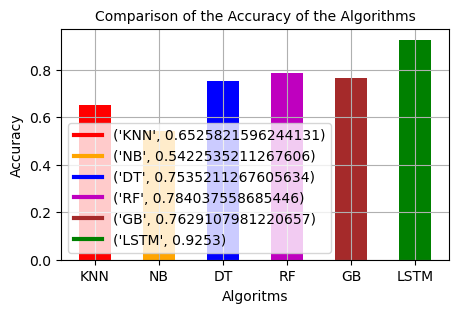

In [60]:
LSTMAccuracy = 0.9253
All_Accurcy=[KNNAccuracy,NaiveBayesAccuracy,DecisionTreeAccuracy,RandomForestAccuracy,GBAccuracy,LSTMAccuracy]
Accuracy=[x for x in range(len(All_Accurcy))]
Algoritms=['KNN','NB','DT','RF','GB','LSTM' ]
plt.figure(figsize=(5,3))

plt.plot([],[], color='red',label=('KNN',KNNAccuracy),linewidth=3)
plt.plot([],[], color='Orange',label=('NB',NaiveBayesAccuracy),linewidth=3)
plt.plot([],[], color='blue',label=('DT',DecisionTreeAccuracy),linewidth=3)
plt.plot([],[], color='m',label=('RF',RandomForestAccuracy),linewidth=3)
plt.plot([],[], color='brown',label=('GB',GBAccuracy),linewidth=3)
plt.plot([],[], color='green',label=('LSTM',LSTMAccuracy),linewidth=3)
 
cols=['red','Orange','blue','m','brown','green']
plt.bar(Algoritms,All_Accurcy, width=0.5 , color=cols)
plt.xlabel('Algoritms')
plt.ylabel('Accuracy')
plt.title('Comparison of the Accuracy of the Algorithms', fontsize=10)
plt.legend(loc=3)
plt.grid()
 
plt.savefig('./Charts/\Comparison of the Accuracy of the Algorithms.jpg')

plt.show(Accuracy,All_Accurcy)
